In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [4]:
df.tail(20)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
279  55.0        0                        84         1                 38   
280  70.0        0                      2695         1                 40   
281  70.0        0                       582         0                 40   
282  42.0        0                        64         0                 30   
283  65.0        0                      1688         0                 38   
284  50.0        1                        54         0                 40   
285  55.0        1                       170         1                 40   
286  60.0        0                       253         0                 35   
287  45.0        0                       582         1                 55   
288  65.0        0                       892         1                 35   
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
279                    0  451000.00               1.3           136    0   
280                    0  241000.00               1.0           137    1   
281                    0   51000.00               2.7           136    1   
282                    0  215000.00               3.8           128    1   
283                    0  263358.03               1.1           138    1   
284                    0  279000.00               0.8           141    1   
285                    0  336000.00               1.2           135    1   
286                    0  279000.00               1.7           140    1   
287                    0  543000.00               1.0           132    0   
288                    0  263358.03               1.1           142    0   
289                    0  390000.00               0.9           144    0   
290                    0  222000.00               0.8           141    0   
291                    0  133000.00               1.4           139    1   
292                    0  382000.00               1.0           140    1   
293                    0  179000.00               0.9           136    1   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
279        0   246            0  
280        0   247            0  
281        1   250            0  
282        1   250            0  
283        1   250            0  
284        0   250            0  
285        0   250            0  
286        0   250            0  
287        0   250            0  
288        0   256            0  
289        0   256            0  
290        0   257            0  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
_df_ = df.drop(['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets'], axis = 'columns')

In [9]:
_df_.head(10)

age  anaemia  diabetes  ejection_fraction  high_blood_pressure  sex  \
0  75.0        0         0                 20                    1    1   
1  55.0        0         0                 38                    0    1   
2  65.0        0         0                 20                    0    1   
3  50.0        1         0                 20                    0    1   
4  65.0        1         1                 20                    0    0   
5  90.0        1         0                 40                    1    1   
6  75.0        1         0                 15                    0    1   
7  60.0        1         1                 60                    0    1   
8  65.0        0         0                 65                    0    0   
9  80.0        1         0                 35                    1    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

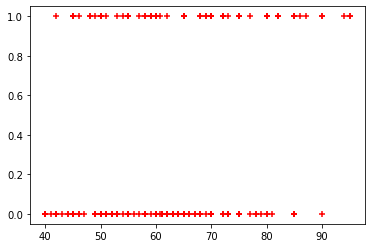

In [10]:
plt.scatter(_df_['age'], _df_['DEATH_EVENT'], color = 'red', marker = '+')

<BarContainer object of 299 artists>

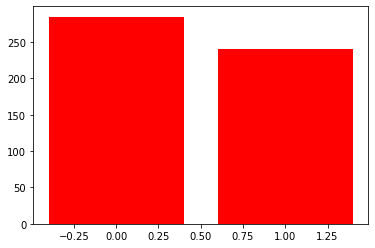

In [11]:
plt.bar( _df_['DEATH_EVENT'], _df_['time'], color = 'red')

In [12]:
x = _df_.drop(['DEATH_EVENT'], axis = 'columns')

In [13]:
x.head()

age  anaemia  diabetes  ejection_fraction  high_blood_pressure  sex  \
0  75.0        0         0                 20                    1    1   
1  55.0        0         0                 38                    0    1   
2  65.0        0         0                 20                    0    1   
3  50.0        1         0                 20                    0    1   
4  65.0        1         1                 20                    0    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [14]:
y = _df_['DEATH_EVENT']

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [190]:
x_test.head()

age  anaemia  diabetes  ejection_fraction  high_blood_pressure  sex  \
201  45.0        0         1                 60                    1    1   
291  60.0        0         0                 35                    0    1   
91   60.0        0         1                 45                    0    1   
137  68.0        1         0                 25                    0    1   
152  50.0        0         0                 45                    1    1   

     smoking  time  
201        0   186  
291        0   258  
91         0    80  
137        0   108  
152        1   118

In [191]:
x_train

age  anaemia  diabetes  ejection_fraction  high_blood_pressure  sex  \
262  65.0        1         1                 25                    0    1   
110  85.0        0         0                 60                    0    1   
20   65.0        1         0                 25                    1    0   
273  42.0        0         0                 40                    0    1   
255  52.0        1         1                 30                    1    1   
..    ...      ...       ...                ...                  ...  ...   
199  60.0        0         1                 35                    0    1   
155  60.0        1         1                 25                    0    1   
156  52.0        1         0                 35                    0    0   
133  63.0        0         0                 60                    1    1   
245  61.0        1         1                 38                    0    1   

     smoking  time  
262        0   235  
110        1    90  
20         0    16  
273        0   245  
255        1   216  
..       ...   ...  
199        1   186  
155        0   120  
156        0   120  
133        1   107  
245        0   213  

[239 rows x 8 columns]

In [192]:
x_train.value_counts()

age   anaemia  diabetes  ejection_fraction  high_blood_pressure  sex  smoking  time
95.0  1        0         40                 1                    0    0        24      1
54.0  0        1         38                 0                    1    0        213     1
55.0  0        1         38                 0                    0    0        246     1
                         35                 1                    0    0        197     1
                                            0                    0    0        215     1
                                                                                      ..
65.0  0        1         35                 0                    0    0        256     1
                         30                 0                    1    1        212     1
                         25                 0                    1    1        154     1
                                                                      0        67      1
40.0  0        0         3

In [193]:
x_train.shape

(239, 8)

In [194]:
x_test.shape

(60, 8)

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
clf = LogisticRegression()

In [197]:
clf.fit(x_train, y_train)

LogisticRegression()

In [202]:
clf.predict(x_train)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [201]:
clf.predict([[55, 0, 1, 30, 0, 1, 0, 66]])

array([1], dtype=int64)

In [199]:
clf.score(x_train, y_train)

0.8451882845188284